<a href="https://colab.research.google.com/github/mokmail/IfcDoc/blob/master/belichtung2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [175]:
import pandas as pd
import numpy as np

# Fensterliste Laden
loc ='fensterliste.xlsx'

liste = pd.read_excel(loc, header=2)
liste2 = pd.read_excel(loc, header=3)



header2 = []

header3=[]


fok=[]

for i in liste:
    header2.append(i)

for i in liste2:
    header3.append(i)


for i in range(len(header2)):
    if 'Unnamed' in header2[i]:
        fok.append(header3[i])
    else:
        fok.append(header2[i])
        

new_liste= zip(fok,header2)
new_listen = {i[0]: liste[i[1]][5:] for i in new_liste}
df = pd.DataFrame(new_listen)
#df.POS , df.ARCHITEKTURLICHTE
#df.to_excel('fenster_flächen.xlsx')

In [176]:
df[['ALH' ,'ARCHITEKTURLICHTE' ]] = df[['ALH' ,'ARCHITEKTURLICHTE']].fillna(0)

# reserve code

'''for i in zip(df.ALH, df.ARCHITEKTURLICHTE, df.TRAPEZ , df.TYP , df.ANMERKUNGEN , df):
  #print(i)
  
 
 if  i[2] =='x':
    if '-' in  str(i[0]):
    #df.loc[df.ALH == i[0], ['ALH']] =  b1[0]
      
      b1 = np.float(i[0].split('-')[0])
      b2 = np.float(i[0].split('-')[1])
      FL = np.float(i[1]*b1 + 0.5*i[1]*(b2-b1)) /1000000
      df.loc[df.TRAPEZ == 'x', ['FLA']] =  FL
      df.loc[df.TRAPEZ == 'x', ['ALH']] =  b1
  else:
    #print(i[3])
    df.loc[df.TYP == i[3], ['FLA']] =  (i[0]*i[1])/1000000

      
      
    #if len(b1)>1:
      #print(b1)
      #df.loc[df.ALH == i[0], ['ALH2']] =  b1[1]
    #else:
      #df.loc[df.ALH == i[0], ['ALH2']] =  b1[0]
'''
#df.loc[df.TRAPEZ == 'x', ['ALHS']] =   df.ALH.astype(str)

df['ALHS'] = [str(i).split('-')  for i in df.ALH]
df['ALH1'] = [i[0]  for i in df.ALHS   ]

df['ALH2'] = [i[1] if len(i)>1 else i[0]  for i in df.ALHS ]
df['Belichtung'] = (df.ALH1.astype(float) * df.ARCHITEKTURLICHTE.astype(float) + (  df.ARCHITEKTURLICHTE.astype(float) * (df.ALH2.astype(float) -df.ALH1.astype(float) ) *.5)) /1000000



fenster =pd.DataFrame({'POS' : df.POS ,'TYP' :df.TYP.astype(str) , 'ALB': df.ARCHITEKTURLICHTE , 'ALH1':df.ALH1,'ALH2':df.ALH2 , 'Belichtung': df.Belichtung  } )
#alle[['Fläche', 'POS','TYP','ALB','ARH']] = alle[['Fläche','POS','TYP','ALB','ARH']].fillna(0)
#fenster.to_excel('fenster_flächen.xlsx')
#df.to_excel('probe.xlsx')
fenster

,POS,TYP,ALB,ALH1,ALH2,Belichtung
5,F.01.001a,01a,700,1450,1450,1.0150
6,F.01.001b,01b,1670,2300,2300,3.8410
7,F.01.001c,01c,1820,2300,2300,4.1860
8,F.01.002,01,2100,1450,1450,3.0450
9,F.01.002a,02a,430,1450,1450,0.6235
...,...,...,...,...,...,...
546,F.12.022,22a,1880,1500,1500,2.8200
547,F.12.023,22a,1880,1500,1500,2.8200
548,F.12.024,22a,1880,1500,1500,2.8200
549,F.12.025,22a,1880,1500,1500,2.8200


In [177]:
raum ='Raum.xlsx'

fensterdata = pd.read_excel(raum)


fensterdata[['F1','F2','F3' ]] = fensterdata[['F1' ,'F2','F3']].fillna('--')
fensterdata[['WGF' ]] = fensterdata[['WGF']].fillna(0)
fensterdata.to_excel('fenster.xlsx')

In [231]:

raumtiefe_conditions =[
                       fensterdata.WG >0 , fensterdata.WG==0
]

tiefe_choices = [fensterdata.RAUMTIEFE+fensterdata.AUSK,  fensterdata.RAUMTIEFE]
fensterdata['Raumtiefe_2']= np.select(raumtiefe_conditions, tiefe_choices, default=0)

#F.dropna(subset = ["TYP"], inplace=True)

#NF = F.groupby(['TYPE'])

#NF.size().reset_index(name='counts')
fensterdata[10:25]
F = pd.DataFrame({
    'POSITION' : fensterdata['POS'],
    'F1' :fensterdata['F1'].astype(str) ,
                  'F2' :fensterdata['F2'].astype(str)   , 
                  'F3' :fensterdata['F3'].astype(str)  ,
                  'TOP':fensterdata['TOPS'] ,  
                  'Zimmer': fensterdata['RAUM'],
                  'Raumtiefe': fensterdata['RAUMTIEFE'],
                  'Auskrakung': fensterdata['AUSK'] ,
                  'Raumflaeche': fensterdata['RAUMF'] , 
                  'Raumtiefe_2': fensterdata['Raumtiefe_2'] , 
                  'geteilt': fensterdata['Unnamed: 6'],
                  'M': fensterdata['FENSTERFL_M'],
                  'GF': fensterdata['WGF'] + fensterdata.RAUMF
                  
                   })
F[['geteilt']] = F['geteilt'].fillna(np.float(1.0))

for i in zip(fenster.TYP , fenster['Belichtung']):
  finder = i[0]
  F.loc[F.F1 == finder, ['F1_F']] =  i[1] 
  F.loc[F.F2 == finder, ['F2_F']] =  i[1] 
  F.loc[F.F3 == finder, ['F3_F']] =  i[1] 


F.loc[F.F1 == 'PF', ['F1_F']] =  F.M
z = F.set_index('POSITION', append=True).swaplevel(0,1)

ind=['FENSTER', 'FENSTER', 'FENSTER', 'TOP', 'Zimmer', 'Raumtiefe', 'Auskrakung',
       'Raumflaeche', 'Raumtiefe_2', 'geteilt', 'M', 'GF', 'Fläche Fenster 1', 'Fläche Fenster 1',
       'Fläche Fenster 1']
ins=z.columns
inds=[ind, ins]

z= pd.DataFrame(z , columns=inds)
Y= F.T.groupby(0).sum()
Y


,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,...,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150
0,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0.0,240,204,0,182,0,234,0,236,0,261,253,65,75,253,75,253,75,75,165,204,451,200,0,200,0,0,507,204,286,333,0,260,0,260,260,0,0,286,333,0,...,293,0,91,195,0,195,0,366,206,0,366,206,0,0,0,0,0,0,0,0,183,0,183,0,184,0,184,0,298,0,176,176,176,0,0,0,0,0,0,0
1.0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
1.015,0,0,0.6235,0,1.015,0,1.4065,0,1.41665,0,0,0,3.519,0,3.519,0,3.519,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2.82,0,2.82,3.1382,0,0,3.337,0,0,2.997,0,0,0,2.1306,0,0,3.2929,0,3.5015,0,7.0057,0,7.4495,0,0,0,0,0,0,0,0,2.997,0,0,11.3373,2.4531
3.045,4.186,2.369,3.045,4.646,3.045,4.646,3.045,4.646,3.045,4.14,4.209,4.025,5.405,4.209,5.405,4.209,5.405,4.209,6.509,5.037,2.369,5.037,2.369,5.037,2.369,2.726,3.749,2.369,5.589,2.323,2.175,4.094,2.323,6.946,2.254,2.175,2.323,5.589,2.323,3.9528,...,27.16,2.82,6.02,8.9505,2.82,9.5175,2.82,3.675,2.82,2.82,3.675,2.82,2.82,2.82,7.6024,2.82,2.82,10.9174,2.82,2.82,6.2543,2.82,6.6505,2.82,2.82,2.82,2.82,2.82,13.69,2.82,14.59,6.28,28.52,2.82,2.82,2.82,7.6024,2.82,2.82,2.1306
3.841,0,0,2.576,0,2.576,0,2.576,0,2.576,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,2.1306,0,0,0,2.82,0,0,0,0,0,0,3.2929,0,3.5015,0,0,0,0,0,0,0,0,2.1306,0,0,0,0
15.24,16.76,27.52,41.84,19.16,43.4,18.58,44.96,18.58,49.74,19.62,45.54,27.54,41.84,27.27,41.84,27.27,41.99,27.43,48.39,52.68,29.5,56.8,25.74,52.52,24.08,33.6,11.72,23.32,47.82,21.42,14.2,27.6,21.42,59.42,11.44,9.74,23.3,47.82,21.42,40.14,...,88.86,24.26,22.74,54.92,31.62,54.92,31.62,57.5,20.02,22.1,57.5,20.02,22.1,29.34,23.76,30.48,23.9,45.62,27.4,27.78,64.02,22.74,64.02,22.74,60.36,21.28,60.36,21.28,80.02,24.26,39.34,22.06,105.62,22,22.68,30.48,21.02,30.48,47.68,27.64
632.0,764,963,1398,826,1452,826,1506,826,1566,826,1649,1073,1477,1085,1477,1085,1477,907,1591,606,866,1352,866,1240,706,1106,634,628,716,784,808,1306,784,1306,622,742,872,716,784,1396,...,1394,696,852,1216,760,1216,760,1548,460,838,1548,460,838,1042,568,822,802,1396,1066,1080,1434,872,1434,872,1264,618,1264,618,1870,696,610,850,1598,654,674,1050,536,822,1124,536
"001, 015, 029, 047, 065, 083, 101, 118","001, 015, 029, 047, 065, 083, 101, 118","001, 015, 029, 047, 065, 083, 101, 118","002, 016, 030, 048, 066, 084, 102, 119","002, 016, 030, 048, 066, 084, 102, 119","003, 017, 031, 049, 067 ,085, 103, 120","003, 017, 031, 049, 067 ,085, 103, 120","004, 018, 032, 050, 068 , 086, 104, 121","004, 018, 032, 050, 068 , 086, 104, 121","005, 019, 033, 051, 069, 087, 105, 122","005, 019, 033, 051, 069, 087, 105, 122","006, 020, 038 ,056, 074, 092","006, 020, 038 ,056, 074, 092","007, 021, 039, 057, 075, 093","007, 021, 039, 057, 075, 093","008, 022, 040, 058, 076, 094","008, 022, 040, 058, 076, 094","009, 023, 041, 059, 077, 095","009, 023, 041, 059, 077, 095","010, 024, 042, 060, 078, 096","011, 025, 043, 061 ,079, 097","011, 025, 043, 061 ,079, 097","012, 026, 044, 062, 080, 098, 115, 130","012, 026, 044, 062, 080, 098, 115, 130","013, 027, 045, 063, 081, 099, 116, 131","013, 027, 045, 063, 081, 099, 116, 131","014, 028, 046, 064, 082, 100, 117, 132","014, 028, 046, 064, 082, 100, 117, 132","014, 028, 046, 064, 082, 100, 117, 132","034,, 052, 070 , 088, 106","034,, 052, 070 , 088, 106","035, 053 , 071, 089, 107","035, 053 , 071, 089, 107","035, 053 , 071, 089, 107","036, 054 , 072, 090, 108","036, 054 , 072, 090, 108","036, 054 , 072, 090, 108","036, 054 , 072, 090, 108","037, 055, 073, 091,109","037, 055, 073, 091,109",110,...,152,152,152,153,153,161,161,"154,162","154,162","154,162"

In [179]:

#grouped = F.groupby(['TOP' , 'Raum'] ).sum()
#grouped
F['TOP'] = [[str(i).split(',')[j] for j in range(len(str(i).split(',')))] for i in F.TOP]


In [180]:

#F.F1_F = F.F1_F * F.geteilt

F[['F1','F2','F3']] = F[['F1' ,'F2','F3']].fillna(0)
F[['F1_F','F2_F','F3_F','M']] = F[['F1_F' ,'F2_F','F3_F','M']].fillna(0)


F['gesamt_belichtung'] = (F.F1_F +F.F2_F +F.F3_F) * F.geteilt


conditions = [

    (F.Raumtiefe > 500) & (F.Auskrakung < 150),
    (F.Raumtiefe > 500) & (F.Auskrakung > 150),
    (F.Raumtiefe < 500) & (F.Auskrakung > 150),
    ]
   
choices = [(12 + ((F.Raumtiefe -500)/100).apply(np.ceil) )/100, (15 + ((F.Raumtiefe -500)/100).apply(np.ceil))/100, 0.15 ]



F['faktor']= np.select(conditions, choices,0.12)
F['WG'] = fensterdata.WG
F['Soll']= F.faktor  *F.Raumflaeche





In [181]:
conditions2 = [

    (F.Raumtiefe_2 > 500) & (F.Raumtiefe_2 >F.Raumtiefe ),
    (F.Raumtiefe_2 > 500) & (F.Raumtiefe_2 == F.Raumtiefe )

    ]
choices_2 = [(12 + ((F.Raumtiefe_2 -500)/100).apply(np.ceil) )/100, F.faktor]
F['faktor_2']= np.select(conditions, choices, default=F.faktor)



In [182]:
conditions_mit_loggia = [

    (F.WG >0) & (F.WG <F['gesamt_belichtung']),
    (F.WG >0) & (F.WG >F['Soll'])]

    
choices_soll_mit_loggia = [F.faktor_2*F.GF, F.faktor *F.GF]
choices_ist_mit_loggia = [F.WG, F['gesamt_belichtung']]
F['Ist2']= np.select(conditions_mit_loggia, choices_ist_mit_loggia)
F['Soll2']= np.select(conditions_mit_loggia, choices_soll_mit_loggia)

#F.to_excel('fensterliste_out.xlsx')
F[10:25]

,POSITION,F1,F2,F3,TOP,Zimmer,Raumtiefe,Auskrakung,Raumflaeche,Raumtiefe_2,geteilt,M,GF,F1_F,F2_F,F3_F,gesamt_belichtung,faktor,WG,Soll,faktor_2,Ist2,Soll2
10,v005,05,--,--,"[005, 019, 033, 051, 069, 087, 105, 122]",Zimmer,413.0,261.0,9.81,413.0,1.0,0.0,9.81,4.140,0.000,0.0,4.140,0.15,0.00,1.4715,0.15,0.000,0.0000
11,v006,15,--,--,"[006, 020, 038 , 056, 074, 092]",Wohnküche,698.0,253.0,20.10,951.0,1.0,0.0,25.44,4.209,0.000,0.0,4.209,0.17,4.45,3.4170,0.17,4.209,4.3248
12,v006,14,--,--,"[006, 020, 038 , 056, 074, 092]",Zimmer,504.0,65.0,13.09,569.0,1.0,0.0,14.45,4.025,0.000,0.0,4.025,0.13,6.22,1.7017,0.13,4.025,1.8785
13,v007,16,16a,--,"[007, 021, 039, 057, 075, 093]",Wohnküche,701.0,75.0,19.93,776.0,1.0,0.0,21.91,5.405,3.519,0.0,8.924,0.15,5.78,2.9895,0.15,5.780,3.2865
14,v007,17,--,--,"[007, 021, 039, 057, 075, 093]",Zimmer,416.0,253.0,11.11,669.0,1.0,0.0,16.16,4.209,0.000,0.0,4.209,0.15,3.58,1.6665,0.15,3.580,2.4240
15,v008,16,16a,--,"[008, 022, 040, 058, 076, 094]",Wohnküche,701.0,75.0,19.93,776.0,1.0,0.0,21.91,5.405,3.519,0.0,8.924,0.15,5.51,2.9895,0.15,5.510,3.2865
16,v008,17,--,--,"[008, 022, 040, 058, 076, 094]",Zimmer,416.0,253.0,11.11,669.0,1.0,0.0,16.16,4.209,0.000,0.0,4.209,0.15,4.07,1.6665,0.15,4.070,2.4240
17,v009,16,16a,--,"[009, 023, 041, 059, 077, 095]",Wohnküche,701.0,75.0,20.00,776.0,1.0,0.0,21.99,5.405,3.519,0.0,8.924,0.15,5.66,3.0000,0.15,5.660,3.2985
18,v009,17,--,--,"[009, 023, 041, 059, 077, 095]",Zimmer,416.0,75.0,11.01,491.0,1.0,0.0,16.42,4.209,0.000,0.0,4.209,0.12,5.74,1.3212,0.12,4.209,1.9704
19,v010,18,--,--,"[010, 024, 042, 060, 078, 096]",Wohnküche SZ,713.0,165.0,21.47,878.0,1.0,0.0,26.92,6.509,0.000,0.0,6.509,0.18,7.75,3.8646,0.18,6.509,4.8456


In [183]:
status_ohne_conditions=[

    F.gesamt_belichtung>F.Soll 
    , F.gesamt_belichtung<F.Soll]

    
choices_status_ohne_loggia = ['O', 'X']
F['Status']= np.select(status_ohne_conditions, choices_status_ohne_loggia, '--')



status_mit_conditions=[

    F.Ist2>F.Soll2  
    , F.Ist2<F.Soll2]

    
choices_status_mit_loggia = ['O', 'X']
F['Status_mit_Loggia']= np.select(status_mit_conditions, choices_status_mit_loggia, '--')



fenster_1 = pd.DataFrame(pd.concat([F.F1, F.F2 , F.F3], axis=1) )

#F.to_excel('results/Belichtung.xlsx')
result = pd.DataFrame({
   'TOP': F.TOP ,
    'Raum': F.Zimmer,
     'Fenster':F.F1 +', '+ F.F2 + ', ' +F.F3,
      'Raumtiefe in cm': F.Raumtiefe_2,
       'Raumfläche in m²' : F.GF ,
        'Soll Belichtung in %':F.faktor_2 ,
        'Ist Belichtung in %' : F.gesamt_belichtung/F.Raumflaeche,
        'Soll Belichtung in % bei Verglasung' : F.faktor_2,
        'Ist Belichtung in % bei Verglasung' : F.Ist2/F.GF

})



#result.to_excel('Belicht.xlsx' ,  float_format='%.2f' , index=False)


result.sort_values(by='TOP')
result.loc[result.Raum =='Zimmer', ['TYP']] = '1 Zimmer Wohnung'
result

,TOP,Raum,Fenster,Raumtiefe in cm,Raumfläche in m²,Soll Belichtung in %,Ist Belichtung in %,Soll Belichtung in % bei Verglasung,Ist Belichtung in % bei Verglasung,TYP
0,"[001, 015, 029, 047, 065, 083, 101, 118]",Wohnküche T1,"01, 01a, 01b",632.0,15.24,0.14,0.518438,0.14,0.0,NaN
1,"[001, 015, 029, 047, 065, 083, 101, 118]",Wohnküche T2,"01c, --, --",382.0,8.38,0.15,0.499523,0.15,0.0,NaN
2,"[001, 015, 029, 047, 065, 083, 101, 118]",Zimmer,"20, --, --",481.5,13.76,0.15,0.172166,0.15,0.0,1 Zimmer Wohnung
3,"[002, 016, 030, 048, 066, 084, 102, 119]",Wohnküche,"01, 02a, 02b",699.0,20.92,0.14,0.298494,0.14,0.0,NaN
4,"[002, 016, 030, 048, 066, 084, 102, 119]",Zimmer,"02c, --, --",413.0,9.58,0.15,0.484969,0.15,0.0,1 Zimmer Wohnung
...,...,...,...,...,...,...,...,...,...,...
146,[163],Wohnküche,"22a, 26, 42a",525.0,15.24,0.13,0.521496,0.13,0.0,NaN
147,[163],Wohnküche T2,"42, --, --",268.0,10.51,0.12,0.723349,0.12,0.0,NaN
148,[163],Zimmer,"22a, --, --",411.0,15.24,0.12,0.185039,0.12,0.0,1 Zimmer Wohnung
149,[164],Wohnküche,"22a, 48, --",562.0,23.84,0.13,0.593846,0.13,0.0,NaN


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


KeyError: ignored

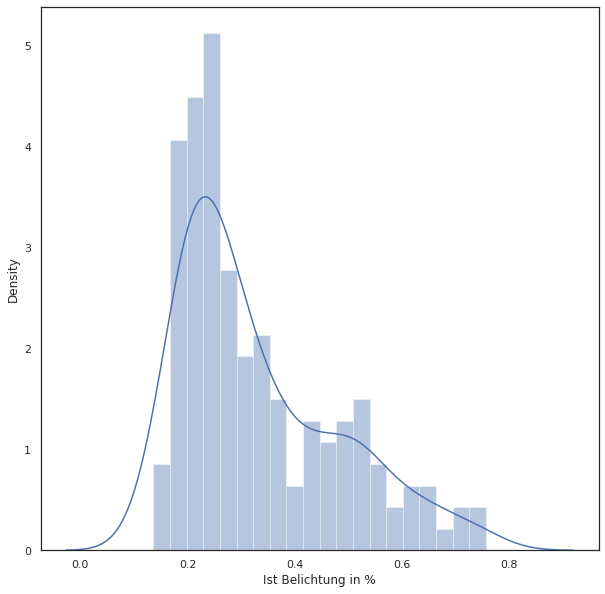

In [184]:
import matplotlib.pyplot as plt



import seaborn as sns
plt.figure(figsize=(10,10))

sns.axes_style({'axes.facecolor': 'white' ,  'grid.linestyle': '-'})
sns.set_theme(style='white')

sns.distplot( result['Ist Belichtung in %' ],bins=20)

sns.distplot( result['Raumfläche' ]/100, bins=20)


In [ ]:

sns.jointplot(x='Raumfläche' , y='Ist Belichtung in %', data=result ,kind='hex')

In [ ]:
sns.rugplot( result.Raumfläche)

In [ ]:
sns.barplot(x='Soll Belichtung in %' , y='Ist Belichtung in %', data=result, hue= 'Raum' )

In [ ]:
sns.countplot(x='Raumtiefe', data=result )

In [ ]:
plt.figure(figsize=(50,20))
sns.boxplot(x='Soll Belichtung in %',y='Ist Belichtung in %', data=result , hue ='Raum')

In [ ]:
plt.figure(figsize=(10,10))
sns.stripplot(x='Ist Belichtung in %',y='Soll Belichtung in %', data=result  , jitter = True , dodge=True)

In [ ]:
sns.swarmplot(x='Ist Belichtung in %',y='Soll Belichtung in %', data=result   )